# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [10]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return (x**2)*numpy.sin(x)

2.4674011002723395


Ensure your function works with numpy arrays:

In [11]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [21]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2*x*numpy.sin(x)-((x**2)-2)*numpy.cos(x) - 2

Check your solution with the same numpy array:

In [22]:
assert g(0) == 0.

In [23]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [28]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin)

Check your analytic function:

In [29]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [91]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''    
    N=2*N
    sum = f(xmin) + f(xmax) #take these values out of sum so not iterated with odd/even parts of simps in for loops
    dx=(xmax-xmin)/N #define dx
    if N % 2 == 0:
        for i in range(1, N, 2): #itirative sum over odd 
            sum += 4 * f(xmin + i*dx)
        for i  in range(2, N-1, 2):
            sum += 2 * f(xmin + i*dx) #iterative sum over even
    else:
        for i in range(1, N-1,2):
            sum += 4 * f(xmin + i*dx)
        for i in range(2, N,2):
            sum += 2 * f(xmin + i*dx)
    return (dx/3)*sum

2.469483380396927

Make sure you have implemented Simpson's rule correctly:

In [75]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [76]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


[2.4690909838319284, 2.4694592002574316, 2.469481874461968, 2.4694832863590164, 2.4694833745209306, 2.4694833800297764, 2.469483380374059, 2.4694833803955722, 2.469483380396927]
[0.00015889824090272825, 9.791578178793083e-06, 6.098178492439497e-07, 3.808002773340245e-08, 2.3794780098061537e-09, 1.487094742964341e-10, 9.294735523435761e-12, 5.830115034434613e-13, 3.4347685736490166e-14]


<function matplotlib.pyplot.show>

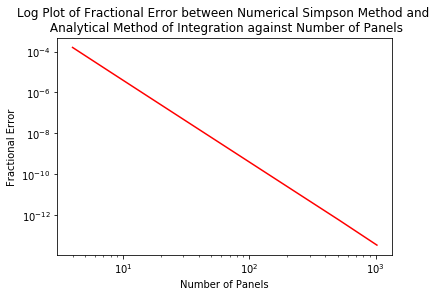

In [116]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

result_numeric=[]
for i in range(0,9,1):
    result_numeric.insert(i, integrate_numeric(x0,x1,panel_counts[i]))
print(result_numeric)

y_err=[]
for i in range(0,9,1):
    y_err.insert(i, abs( result_numeric[i]-result_analytic )/result_analytic)
print(y_err)

plt.title('Log Plot of Fractional Error between Numerical Simpson Method and \n Analytical Method of Integration against Number of Panels')
plt.ylabel('Fractional Error')
plt.xlabel('Number of Panels')

plt.plot(panel_counts, y_err, color='red')
plt.yscale('log')
plt.xscale('log')

plt.show




What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The accuracy numerical method will increase as number of panels becomes larger. If N is taken too large then there will be round off errors.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

For the trapezium rule the error goes as N^-2 (higher N means lower error) compared to N^-4 for the Simpson Rule. Will be less accurate for the same N but at higher N will not have round off issues as quickly as the Simpson rule.